# AI_Project Heart Disease Predicition

by Arjun Suresh (AJ)

AI in healthcare has always been an interesting topic for me. I personally hope to see AI evolve and grow in this field so that it can help result in quicker diagnoses and save many more lives. This project aims to build predictive models for heart disease, in hopes that hopefully in the future, predictive models are able to better help doctors in their diagnoses of conditions.

In [ ]:
# Step 1: Import necessary libraries
from google.colab import files

# Step 2: Upload the file
uploaded = files.upload()

Saving heart_disease_health_indicators_BRFSS2015.csv to heart_disease_health_indicators_BRFSS2015.csv


In [ ]:
!ls

heart_disease_health_indicators_BRFSS2015.csv  sample_data


In [ ]:
import pandas as pd

# Step 3: Read the uploaded file into a DataFrame
# Assuming the uploaded file is a CSV file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Display the first few rows of the DataFrame
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Data Preprocessing
Identify Missing or Invalid Values:

1. It checks how many rows have a value of 0 for each column.
In this dataset, a value of 0 for certain features (e.g., BMI, HighChol, Fruits) might be invalid, as these features cannot logically have a value of 0.
Replace Invalid Values:

2. For selected features (HighChol, BMI, PhysActivity, Fruits, Veggies, MentHlth, PhysHlth), 0 values are replaced with the column's mean.
This helps maintain data consistency while preventing loss of information from removing rows with invalid values.
Standardization:

3. All numeric features (except the target variable HeartDiseaseorAttack) are scaled to have a mean of 0 and a standard deviation of 1.
Standardization ensures that features with different ranges (e.g., Age and BMI) contribute equally to the model training process.
Return Preprocessed Data:

4. The function returns the updated DataFrame with preprocessed features and the original target column HeartDiseaseorAttack.


Binary Indicator

1. While binary features are included in the standardization process (StandardScaler), the scaling operation simply centers the data to have a mean of 0 and a standard deviation of 1.

2. This transformation does not distort the binary value, it simply rescales them to ensure all features contribute proportionally to the neural network training, regardless of their original range.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 4: Data Preprocess
# Preprocessing function for heart disease dataset
def preprocess_heart_disease(df):
    print("Before preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col] == 0].shape[0]
        print(f"{col}: {missing_rows}")

    # Replace 0 values with the mean for selected features where 0 is invalid
    features_to_replace = ['HighChol', 'BMI', 'PhysActivity', 'Fruits', 'Veggies', 'MentHlth', 'PhysHlth']
    for feature in features_to_replace:
        df[feature] = df[feature].replace(0, np.nan)
        df[feature] = df[feature].fillna(df[feature].mean())

    print("\nAfter preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col] == 0].shape[0]
        print(f"{col}: {missing_rows}")

    # Standardize the data - So that values above 1 affect the neural net similarly.
    # Features are standardized uniformly to avoid bias due to scale differences.
    scaler = StandardScaler()
    feature_columns = [col for col in df.columns if col != 'HeartDiseaseorAttack']
    df_scaled = scaler.fit_transform(df[feature_columns])
    df_scaled = pd.DataFrame(df_scaled, columns=feature_columns)
    df_scaled['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack']

    return df_scaled

# Apply preprocessing
preprocessed_heart_disease_df = preprocess_heart_disease(df)

# Display the preprocessed data
preprocessed_heart_disease_df.head()


Before preprocessing
Number of rows with 0 values for each variable
HeartDiseaseorAttack: 229787
HighBP: 144851
HighChol: 146089
CholCheck: 9470
BMI: 0
Smoker: 141257
Stroke: 243388
Diabetes: 213703
PhysActivity: 61760
Fruits: 92782
Veggies: 47839
HvyAlcoholConsump: 239424
AnyHealthcare: 12417
NoDocbcCost: 232326
GenHlth: 0
MentHlth: 175680
PhysHlth: 160052
DiffWalk: 211005
Sex: 141974
Age: 0
Education: 0
Income: 0

After preprocessing
Number of rows with 0 values for each variable
HeartDiseaseorAttack: 229787
HighBP: 144851
HighChol: 0
CholCheck: 9470
BMI: 0
Smoker: 141257
Stroke: 243388
Diabetes: 213703
PhysActivity: 0
Fruits: 0
Veggies: 0
HvyAlcoholConsump: 239424
AnyHealthcare: 12417
NoDocbcCost: 232326
GenHlth: 0
MentHlth: 0
PhysHlth: 0
DiffWalk: 211005
Sex: 141974
Age: 0
Education: 0
Income: 0


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack
0,1.153688,0.0,0.196922,1.757936,1.120927,-0.205637,-0.425292,0.0,0.0,0.0,...,-0.303173,2.329121,1.348732e+00,5.212991e-01,2.223615,-0.887021,0.316900,-1.065595,-1.474487,0.0
1,-0.866785,0.0,-5.078164,-0.511806,1.120927,-0.205637,-0.425292,0.0,0.0,0.0,...,3.298445,0.457294,3.135025e-16,-2.640989e-16,-0.449718,-0.887021,-0.337933,0.963272,-2.440138,0.0
2,1.153688,0.0,0.196922,-0.057858,-0.892119,-0.205637,-0.425292,0.0,0.0,0.0,...,3.298445,2.329121,3.466567e+00,2.751416e+00,2.223615,-0.887021,0.316900,-1.065595,0.939638,0.0
3,1.153688,0.0,0.196922,-0.209174,-0.892119,-0.205637,-0.425292,0.0,0.0,0.0,...,-0.303173,-0.478619,3.135025e-16,-2.640989e-16,-0.449718,-0.887021,0.971733,-2.080028,-0.026012,0.0
4,1.153688,0.0,0.196922,-0.663122,-0.892119,-0.205637,-0.425292,0.0,0.0,0.0,...,-0.303173,-0.478619,-1.298561e+00,-2.640989e-16,-0.449718,-0.887021,0.971733,-0.051162,-0.991662,0.0


In [ ]:
# Mean values should be machine epsilon.
epsilon = np.finfo(float).eps
print(epsilon)

2.220446049250313e-16


In [ ]:
from tensorflow import keras
class DiagnosticCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}: loss = {logs['loss']:.4f}, accuracy = {logs['accuracy']:.4f}")

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 5: Split the data into training and testing sets
X = preprocessed_heart_disease_df.drop('HeartDiseaseorAttack', axis=1)
y = preprocessed_heart_disease_df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Step 6: Build the neural network model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, verbose=2, validation_data=(X_test, y_test))

# Evaluate the model
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

train_accuracy, test_accuracy


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
6342/6342 - 17s - 3ms/step - accuracy: 0.9070 - loss: 0.2443 - val_accuracy: 0.9069 - val_loss: 0.2439
Epoch 2/20
6342/6342 - 17s - 3ms/step - accuracy: 0.9081 - loss: 0.2397 - val_accuracy: 0.9071 - val_loss: 0.2435
Epoch 3/20
6342/6342 - 19s - 3ms/step - accuracy: 0.9081 - loss: 0.2390 - val_accuracy: 0.9069 - val_loss: 0.2429
Epoch 4/20
6342/6342 - 11s - 2ms/step - accuracy: 0.9085 - loss: 0.2387 - val_accuracy: 0.9073 - val_loss: 0.2423
Epoch 5/20
6342/6342 - 21s - 3ms/step - accuracy: 0.9083 - loss: 0.2385 - val_accuracy: 0.9073 - val_loss: 0.2422
Epoch 6/20
6342/6342 - 11s - 2ms/step - accuracy: 0.9085 - loss: 0.2383 - val_accuracy: 0.9070 - val_loss: 0.2424
Epoch 7/20
6342/6342 - 13s - 2ms/step - accuracy: 0.9085 - loss: 0.2381 - val_accuracy: 0.9073 - val_loss: 0.2419
Epoch 8/20
6342/6342 - 19s - 3ms/step - accuracy: 0.9083 - loss: 0.2379 - val_accuracy: 0.9072 - val_loss: 0.2430
Epoch 9/20
6342/6342 - 20s - 3ms/step - accuracy: 0.9083 - loss: 0.2378 - val_accuracy: 

(0.9086595177650452, 0.9071468114852905)

In [ ]:
# Results - Accuracy
scores = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Training Accuracy: 90.87%

Testing Accuracy: 90.71%



1586/1586 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


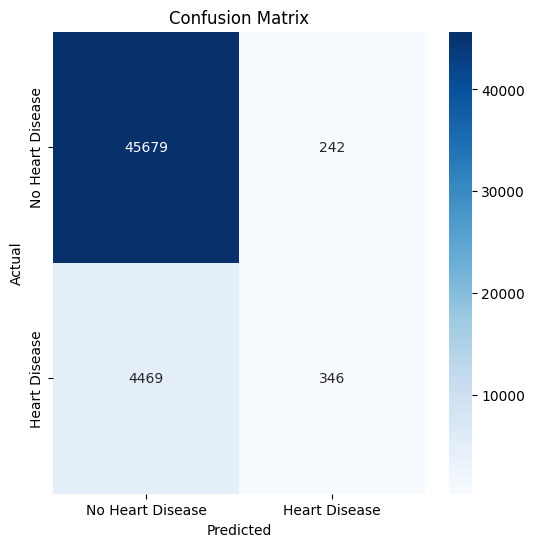

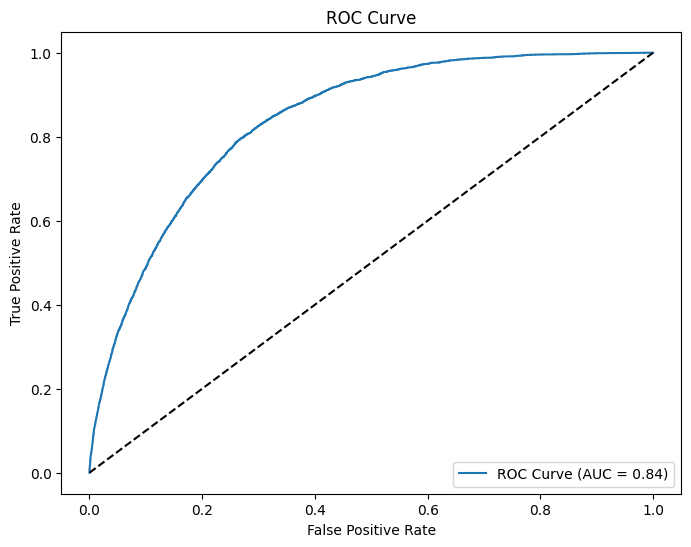

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Generate predictions and probabilities (Replace with model's predictions)
y_test_pred_probs = model.predict(X_test[:len(y_test)]).flatten()  # Predicted probabilities
y_test_pred_binary = (y_test_pred_probs >= 0.5).astype(int)  # Binary predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Heart Disease", "Heart Disease"],
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# Analysis:

* The model is better at predicting "No Heart Disease" but struggles with predicting "Heart Disease," as evidenced by the high number of false negatives.

* Imbalanced data may be influencing the performance, as the model might be biased toward the majority class.

# Potential Improvements:

* Handle Class Imbalance:
  * Use techniques like oversampling the minority class or undersampling the majority class.

  * Adjust the class weights during model training to penalize misclassifications of the minority class more heavily.

# ROC Curve:

* Optimize Threshold:

  * The default threshold of 0.5 may not be optimal for this task. Adjust the threshold to balance sensitivity (true positive rate) and specificity (true negative rate) based on the problem's priorities.

  * Example: If reducing false negatives (missing heart disease cases) is critical, lower the threshold to increase sensitivity.

# Overall:

* The model demonstrates reasonable performance with an AUC of 0.84, indicating it can distinguish between heart disease and no heart disease cases better than random guessing. However, the high false-negative rate (4,469) highlights the need to improve the model's sensitivity, especially for identifying cases of heart disease.
